# Tutorial: Image classification with transfer learning

In this tutorial, we will perform image classification to label images of flowers. We will take advantage of transfer learning to load a base model with pretrained weights and use an image dataset to train our model. We will then explore the properties of our model in term of accuracy, loss estimates as well as in relation to the predicted image labels.

In [1]:
# Package imports.
import os
import cv2

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import random

import tensorflow as tf
from keras.utils import to_categorical
from keras import layers
from sklearn import model_selection, metrics, preprocessing

The following code assumes that the dataset file `data_lecture1_img.zip` is located in your `/content/drive/MyDrive/` folder. If it is located elsewhere on your Google Drive, please adjust the below code accordingly.

Note: Comment this out if you are running the notebook locally on your own computer.

In [2]:
# Import and mount Google Drive.
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Unzip the dataset file and store it in a folder called images.
!unzip "/content/drive/MyDrive/data_lecture1_img.zip" -d "/content/drive/MyDrive/images/"

## 1. Loading our data

First, we need to load our data. There are numerous ways of doing this step. This is just one example. Feel free to change it.

The following code reads in the images, resizes them to a pixel size of 115 x 115 and appends them to our `data` list.

We also generate a list of `labels` based on the folder location of the individual images.

In [ ]:
folder_path = "/content/drive/MyDrive/images/flowers/"
size = 115
data = []
labels = []

for folder in os.listdir(folder_path):
    for files in os.listdir(os.path.join(folder_path, folder)):
        if files.endswith("jpg"):
            labels.append(folder)
            # Create the image path.
            img_path = os.path.join(folder_path, folder, files)
            # Read in the images.
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)
            # Change BGR colour default from cv2 to RGB used in matplotlib.
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Resize the images.
            img = cv2.resize(img, (size, size))
            data.append(img)

# Convert the data from a list to a NumPy array.
data_arr = np.array(data)

## 2. Visualising our data

Let's take a closer look at the actual data we have just loaded.

To see how many images we have per class, we are going to make a bar chart of our 5 classes.

In [ ]:
# TO-DO: Count the number of individual objects in the 5 classes.

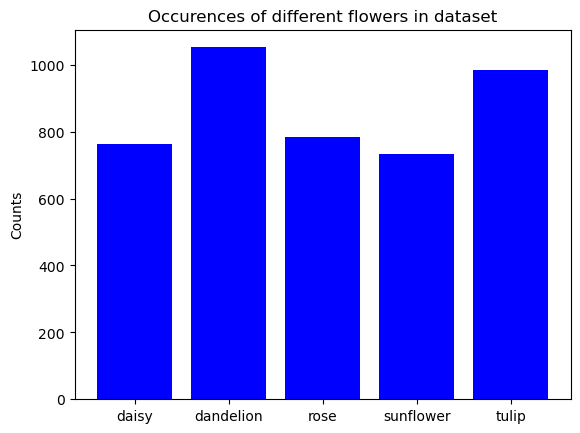

In [ ]:
# TO-DO: Make a bar chart of the classes similar to the one below.

Next, we are going to take a closer look at an individual image, focusing on the very first image of a daisy in our dataset.

In [ ]:
data_arr[0].shape

(115, 115, 3)

The image has a size of 115 x 115 pixel, as expected, and is composed of 3 matrices that represent the RGB values of our colour image.

Let's make a plot of our daisy and the three channels.

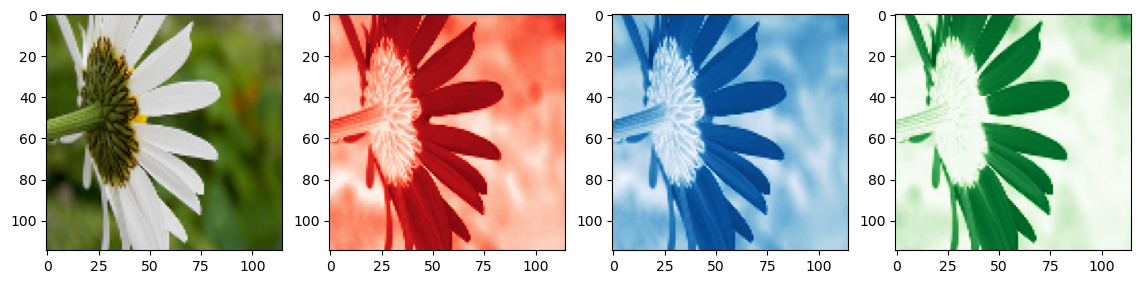

In [ ]:
# TO-DO: Make a plot of the full image and the three RGB channels similar to the one below.

## 3. Preprocessing

### 3.1 Label encoding

As a first step, we preprocess our class labels. The strings in our `labels` list can be converted to numerical labels using the `fit_transform()` function from `scikit-learn` label encoder (see [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) for details).

In [ ]:
# TO-DO: Transform the flower class labels using integer encoding.

However, for categorical variables that do not contain an internal relationship (there is no order between our different flower classes), this integer encoding is not enough to perform deep learning.

For this, we require so-called one-hot encoding, where integer labels are converted to binary vectors. We can achieve this by using Keras's `to_categorical()` function keeping in mind that we have 5 classes in our problem.

The function converts each integer label in `labels_encoded` into a binary vector of length 5, where the index corresponding to the label is set to 1 and all other entries are 0.

In [ ]:
# TO-DO: Transform the integer encoding using one-hot encoding.

### 3.2 Normalising data

RBG values take on values between 0 and 255. We thus have to normalise our data before we use it for neural network optimisation.

In [ ]:
print(np.min(data_arr))
print(np.max(data_arr))

0
255


In [ ]:
# TO-DO: Normalise your image data.

### 3.3 Splitting our data

For the final stage of preprocessing, we split our data into a training and validation dataset using `scikit-learn`'s `train_test_split()` function.

We will use a split of 30/70 here but you should explore how your classification performance changes if you change the split.

In [ ]:
# TO-DO: Create a training and validation set with a 30/70 split.

## 3. Defining our model

Let's use a transfer learning approach and define a base model such as VGG19 or any other model from Keras (for details see [here](https://keras.io/api/applications/vgg/)) using the pretrained weights from the ImageNet database.

Note the `input_shape` parameter has to correspond the input shape of our maps. In the following, we will choose `max` pooling, but feel free to explore the performance with average pooling as well.

In [ ]:
# TO-DO: Load the base model (hint: take a look at the lecture notes).

On top of this base model (which encodes general image features), we define our custom layers that will learn patterns specific to our dataset.

To define the model, we use Keras's `Sequential()` class and first add a dense layer with 256 neurons and ReLu activation function and then a dense layer with 5 neurons and softmax actication function to represent our 5 distinct flower classes.

Here, we also choose to freeze our base layers and do not allow fine-tuning (see lecture notes for details).

In [ ]:
# TO-DO: Add additional layers.

In [ ]:
# TO-DO: Create a summary of your model using model.summary(). What does the output show you?

To compile our model, we use the `model.compile()` function. This requires us to specify an optimiser and corresponding learning rate, loss function and metric.

Here, we explore the `Adam` optimiser and set a learning rate of 0.0001 (what happens if you change this learning rate?).

Moreover, we optimise our network using the `categorical_crossentropy` loss suitable for multi-class classification problems. As the metric we choose accuracy.

In [ ]:
# TO-DO: Compile your model.

## 4. Model training

To perform the network training on the training and validation datasets we created above, we use the `model.fit()` function.

We use a batch size of 32 and train our network for 20 epochs.

Note: This will take a while, so I recommend you turn the verbosity to `1` so you can see the optimisation output.

In [ ]:
# TO-DO: Optimise your model.

For any given epoch, you will see the counter increase and look like this `.../95`. Make sure you understand where that 95 is coming from.

## 5. Model evaluation

At this stage, we now want to evaluate our model and its performance.

### 5.1 Training curves

We first plot the training curves, where we show the loss and accuracy estimates for our training and validation data as a function of the training epoch.

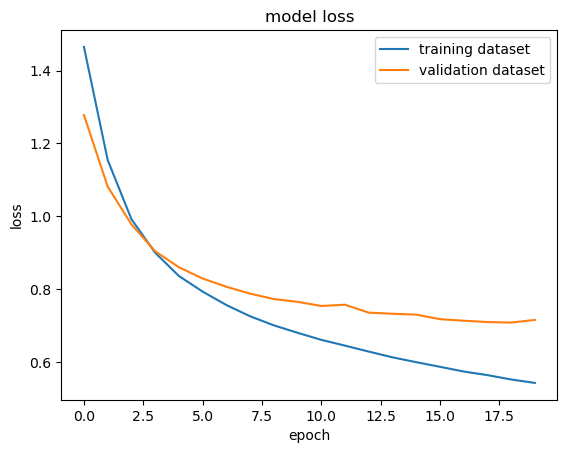

In [ ]:
# TO-DO: Make a plot of your model loss, similar to the one below.

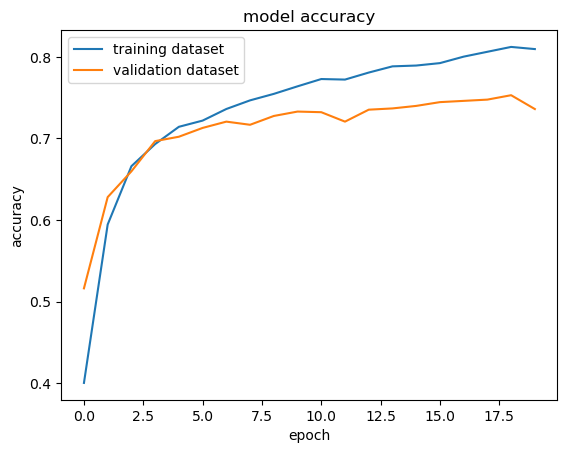

In [ ]:
# TO-DO: Make a plot of your model accuracy, similar to the one below.

Note that we see quite a bit of overfitting here as the validation accuracy is lower than the training accuracy.

In [ ]:
# TO-DO: What does overfitting mean here?

### 5.2 Best loss and accuracy

We can also explicitly extract the best loss and accuracy of our models for the training and the validation datasets.

In [ ]:
# TO-DO: Extract the best training and validation loss and accuracy (hint: take a look at the .history attribute in Keras).

In [ ]:
# TO-DO: What do the results tell you?

### 5.3 Predictions

Finally, we want to actually see some of the predictions on the validation data and visualise these. We do this using the `model.predict()` function in Keras.

In [ ]:
# TO-DO: Predict on the validation data.

We can visualise the prediction to see that we obtain a probabilistic class label. That is, the highest value corresponds to the most probable class of our picture.

In [ ]:
# TO-DO: Print the predictions.

To compare these predictions to our initial validation labels, we extract the index of the largest probability.

In [ ]:
# TO-DO: Extract the index of the largest probability to obtain integer encoding (hint: look into using np.argmax()).

We can now compare these predictions to our original integer encodings and extract those images that were classified correctly and those that were classified incorrectly.

In [ ]:
# TO-DO: Determine which images in the validation set have been correctly and incorrectly classified.

We can also visualise several random of our correctly and incorrectly classified images.

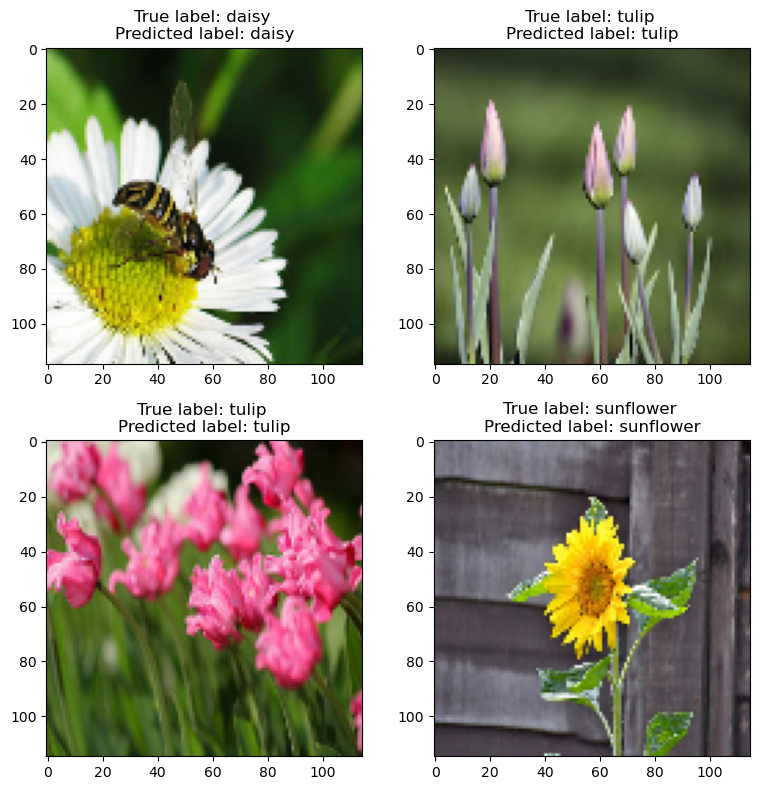

In [ ]:
# TO-DO: Make a plot of several correctly labelled images, similar to the one below.
# Note: to recover the original labels from the integer encoding, we can use the `inverse_transform()` function.

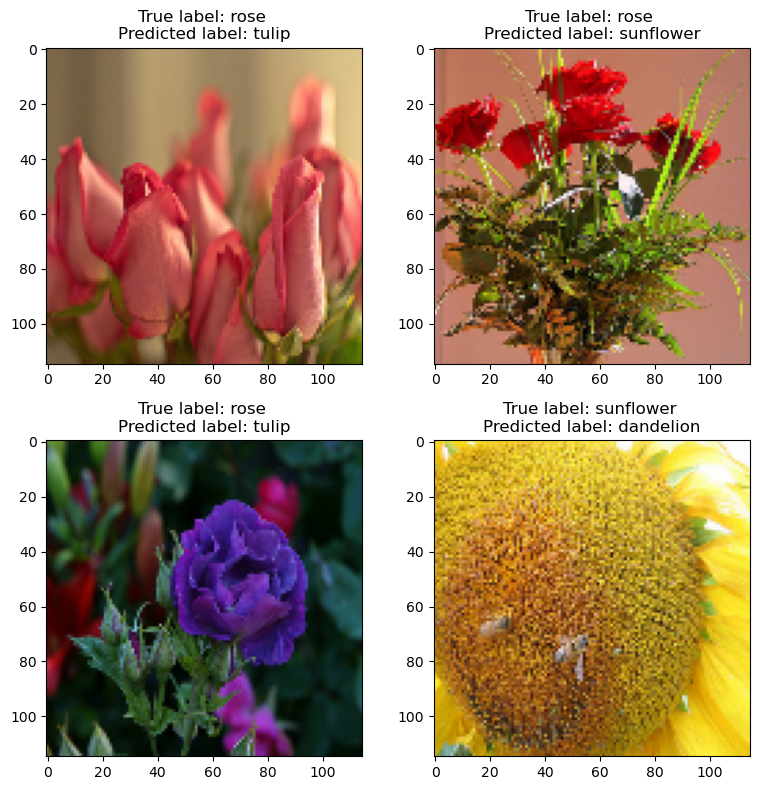

In [ ]:
# TO-DO: Make a plot of several incorrectly labelled images, similar to the one below.

## 6. Data augmentation

In the previous training experiment, we trained our network on the downloaded dataset that we had resized and normalised.

However, resizing and normalisation are not the only kind of preprocessing steps that we can perform on our data.

To increase the diversity of our training dataset and potentially enhance the neural network performance, we can perform so-called data augmentation by applying random but realistic transformations (e.g., rotations) to our images.

In the following, we will use Keras's `ImageDataGenerator` preprocessing function to augment our dataset (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)).

We then perform the same steps as before to define, train and evaluate our model. Finally, we compare the performances for both setups.

In [ ]:
# TO-DO: Create an ImageDataGenerator instance using reasonable choices of parameters for the arguments.

To optimise our network for the augmented data, we first need to apply our augmentation steps to the training data.

In [ ]:
# TO-DO: Apply the augmentation to the training data (hint: use the .flow() method).

In [ ]:
# TO-DO: Define base model as before.

In [ ]:
# TO-DO: Add additional layers on top of frozen base layers.

In [ ]:
# TO-DO: Compile model.

In [ ]:
# TO-DO: Optimising the model.

In [ ]:
# TO-DO: Plotting the loss curves.

In [ ]:
# TO-DO: Plotting the accuracy curves.

In [ ]:
# TO-DO: Extracting the best loss.

In [ ]:
# TO-DO: Extracting the best accuracy.

In [ ]:
# TO-DO: Interpret your results. What do you see in terms of accuracy and overfitting>